In [36]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [37]:
# change working directory
os.chdir('D:\\randal\\SP\\Year 1 Sem 2\\ST1510 Programming for Data Analytics\\CA1\\Data')

In [38]:
# load data
df = pd.read_csv('NumberofGraduatesinHealthcareSpecialisationsbyCourse.csv')
df.head()

,year,graduate_type,no_of_graduates
0,2006,Medical,229
1,2006,Nursing,1140
2,2006,Allied Health Professionals,115
3,2006,Dentistry,30
4,2006,Oral Health Therapist,na


In [39]:
# get all graduate_type values
df['graduate_type'].unique()

array(['Medical', 'Nursing', 'Allied Health Professionals', 'Dentistry',
       'Oral Health Therapist', 'Pharmacy'], dtype=object)

In [40]:
# filter only Medical and Pharmacy
df = df[(df['graduate_type'] == 'Medical') | (df['graduate_type'] == 'Pharmacy')]
df.head()

,year,graduate_type,no_of_graduates
0,2006,Medical,229
5,2006,Pharmacy,81
6,2007,Medical,227
11,2007,Pharmacy,86
12,2008,Medical,227


In [41]:
# check what data type no_of_graduates is
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 95
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             32 non-null     int64 
 1   graduate_type    32 non-null     object
 2   no_of_graduates  32 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [42]:
# change data type of no_of_graduates from object to int
newdf = df.copy(deep=True)
newdf['no_of_graduates'] = df['no_of_graduates'].astype(int)
newdf['no_of_graduates'].dtype

dtype('int32')

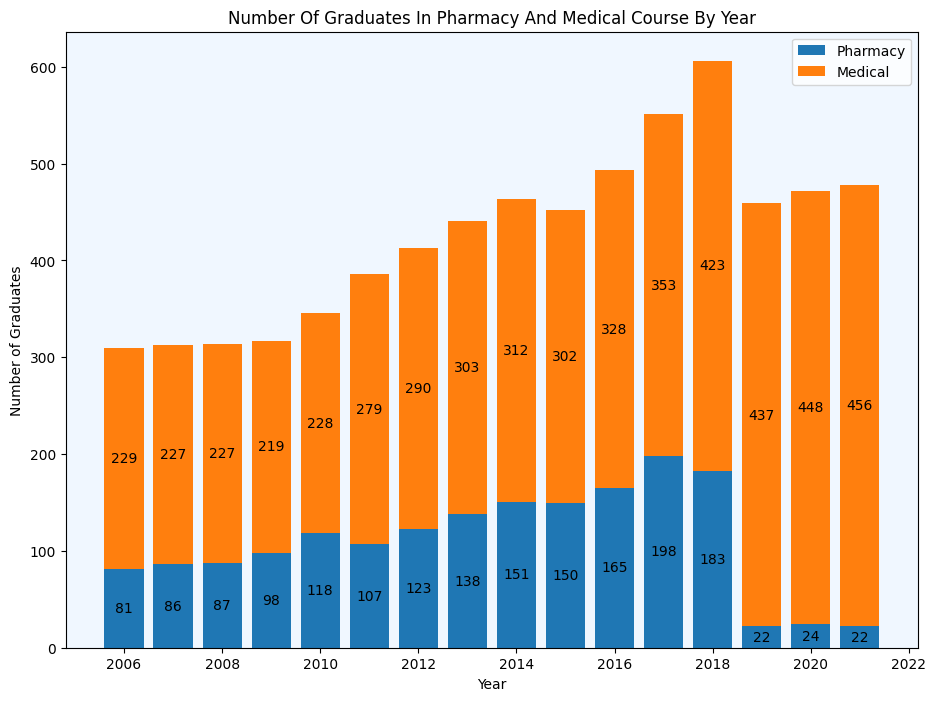

In [43]:
# initialise plotting data
grads = {}

for grad_type in ['Pharmacy', 'Medical']:  # order of grad_type is important hence we used list
    grads[grad_type] = newdf[newdf['graduate_type'] == grad_type]['no_of_graduates'].values
        
years = newdf[newdf['graduate_type'] == 'Pharmacy']['year'].values
bottom = np.zeros(len(grads['Pharmacy']))  # set the base value for each year

# plot stacked barchart
fig, ax = plt.subplots(figsize=(11, 8))

for name, value in grads.items():
    bar = ax.bar(years, value, label=name, bottom=bottom)
    bottom += value  # add the value to set the base value for Medical

    ax.bar_label(bar, label_type='center')

# customise plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Graduates')
ax.set_title('Number Of Graduates In Pharmacy And Medical Course By Year')
ax.legend()

# set background color
ax.set_facecolor((0,0.5,1,0.06))

plt.show()

In [44]:
# load data
df2 = pd.read_csv('NumberofPharmacists.csv')
df2.head()

,year,sector,count
0,2006,Public Sector,449
1,2006,Private Sector,832
2,2006,Not in Active Practice,140
3,2007,Public Sector,484
4,2007,Private Sector,865


In [45]:
# check data type of counts
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    48 non-null     int64 
 1   sector  48 non-null     object
 2   count   48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [46]:
# get all types of sectors
df2['sector'].unique()

array(['Public Sector', 'Private Sector', 'Not in Active Practice'],
      dtype=object)

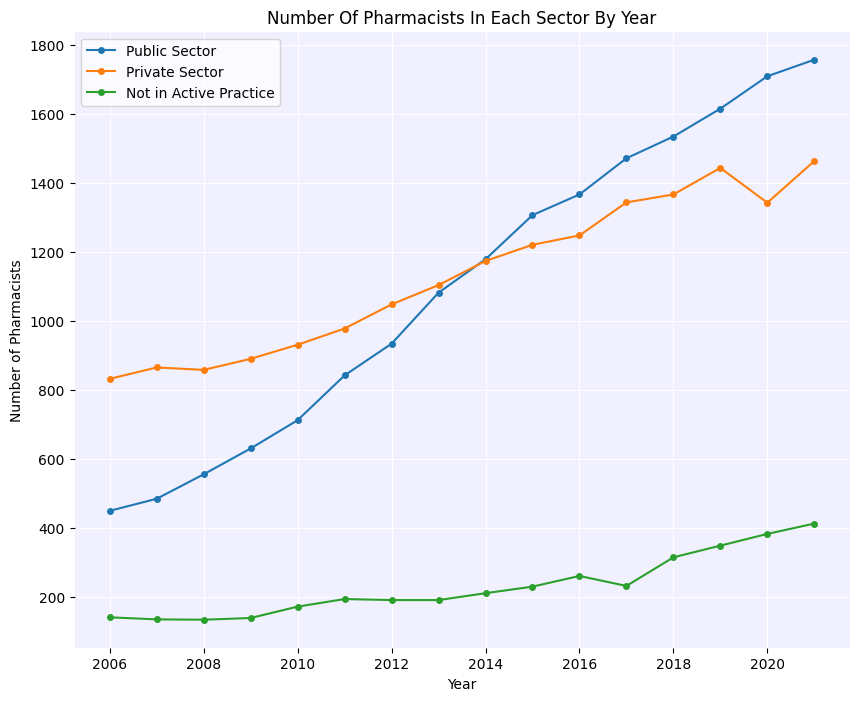

In [47]:
# initialise plot
fig, ax = plt.subplots(figsize=(10, 8))

# extract required data from dataframe
years = df2['year'].unique()
public_sec_count = df2[df2['sector'] == 'Public Sector']['count'].values
private_sec_count = df2[df2['sector'] == 'Private Sector']['count'].values
not_active_count = df2[df2['sector'] == 'Not in Active Practice']['count'].values

# plot linegraph
ax.plot(years, public_sec_count, 'o-', label='Public Sector', ms=4)
ax.plot(years, private_sec_count, 'o-', label='Private Sector', ms=4)
ax.plot(years, not_active_count, 'o-', label='Not in Active Practice', ms=4)

# customise plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Pharmacists')
ax.set_title('Number Of Pharmacists In Each Sector By Year')
ax.legend()

# remove borders
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)

# set gridlines to white
ax.grid(color=(1,1,1))

# set background color
ax.set_facecolor((0,0,1,0.06))

plt.show()

In [48]:
# load data
df5 = pd.read_csv('PolytechnicsIntakeEnrolmentandGraduatesbyCourse.csv')
df5

,year,sex,course,intake,enrolment,graduates
0,2005,MF,Applied Arts,1128,2593,550
1,2005,F,Applied Arts,687,1538,302
2,2005,MF,"Architecture, Building & Real Estate",515,1466,425
3,2005,F,"Architecture, Building & Real Estate",312,870,249
4,2005,MF,Business & Administration,3483,10143,3044
...,...,...,...,...,...,...
403,2021,F,Mass Communication,299,1142,479
404,2021,MF,Natural & Mathematical Sciences,1089,3272,1175
405,2021,F,Natural & Mathematical Sciences,676,1987,731
406,2021,MF,Services,715,2589,1032


In [49]:
# view data type of intake, enrolement and graduates
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       408 non-null    int64 
 1   sex        408 non-null    object
 2   course     408 non-null    object
 3   intake     408 non-null    int64 
 4   enrolment  408 non-null    int64 
 5   graduates  408 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 19.3+ KB


In [50]:
# view all courses
df5['course'].unique()

array(['Applied Arts', 'Architecture, Building & Real Estate',
       'Business & Administration', 'Education', 'Engineering Sciences',
       'Health Sciences', 'Humanities & Social Sciences',
       'Information Technology', 'Law', 'Mass Communication',
       'Natural, Physical & Mathematical Sciences', 'Services',
       'Natural & Mathematical Sciences'], dtype=object)

In [51]:
# filter dataframe
df5 = df5[(df5['year'] == 2021) & (df5['sex'] == 'MF')]
df5

,year,sex,course,intake,enrolment,graduates
384,2021,MF,Applied Arts,1791,5240,1746
386,2021,MF,"Architecture, Building & Real Estate",678,1897,628
388,2021,MF,Business & Administration,3911,12333,4514
390,2021,MF,Education,728,2154,722
392,2021,MF,Engineering Sciences,5657,18053,6276
394,2021,MF,Health Sciences,2396,7580,2669
396,2021,MF,Humanities & Social Sciences,308,910,297
398,2021,MF,Information Technology,2702,7854,2647
400,2021,MF,Law,105,379,91
402,2021,MF,Mass Communication,406,1535,648


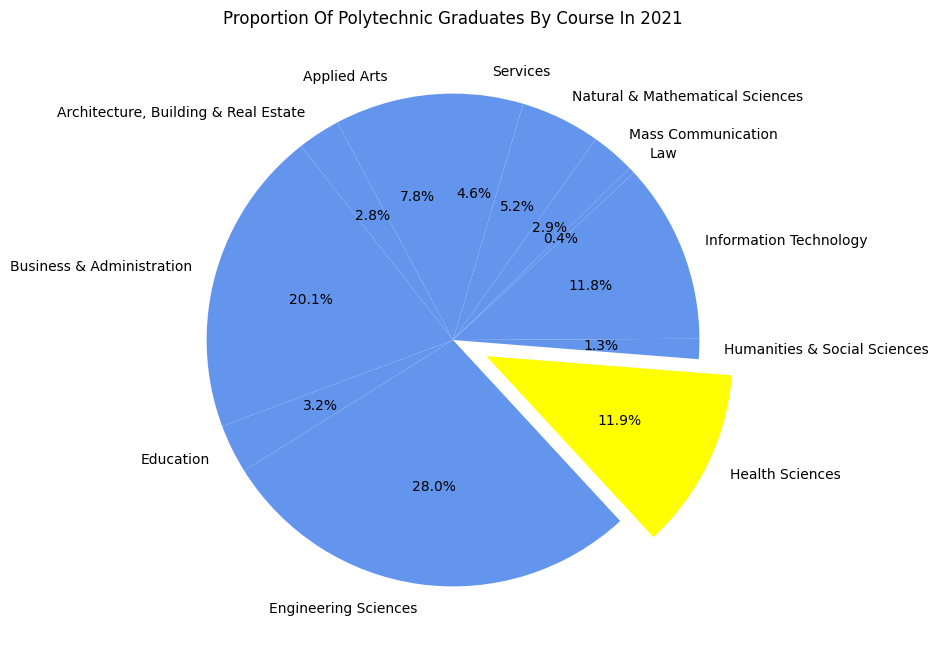

In [52]:
# set emphasized pie chart portion
explode = [0 for i in range(len(df5))]
explode[5] = 0.15

# set color of pie chart
colors = ['cornflowerblue'] * len(df5)
colors[5] = 'yellow'

# plot piechart
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(
    df5['graduates'].values,
    labels=df5['course'].values,
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

# customise plot
ax.set_title('Proportion Of Polytechnic Graduates By Course In 2021')

plt.show()

In [53]:
# load data
df7 = pd.read_csv('GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv')
df7.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [54]:
# view data type of salary data
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       1121 non-null   int64 
 1   university                 1121 non-null   object
 2   school                     1121 non-null   object
 3   degree                     1121 non-null   object
 4   employment_rate_overall    1121 non-null   object
 5   employment_rate_ft_perm    1121 non-null   object
 6   basic_monthly_mean         1121 non-null   object
 7   basic_monthly_median       1121 non-null   object
 8   gross_monthly_mean         1121 non-null   object
 9   gross_monthly_median       1121 non-null   object
 10  gross_mthly_25_percentile  1121 non-null   object
 11  gross_mthly_75_percentile  1121 non-null   object
dtypes: int64(1), object(11)
memory usage: 105.2+ KB


In [59]:
newdf = df7.copy(deep=True)

In [56]:
# view all degrees
newdf['degree'].unique()

array(['Accountancy and Business',
       'Accountancy (3-yr direct Honours Programme)',
       'Business (3-yr direct Honours Programme)',
       'Business and Computing', 'Aerospace Engineering',
       'Bioengineering', 'Chemical and Biomolecular Engineering',
       'Computer Engineering', 'Civil Engineering', 'Computer Science',
       'Electrical and Electronic Engineering',
       'Environmental Engineering', 'Information Engineering and Media',
       'Materials Engineering', 'Mechanical Engineering',
       'Maritime Studies', 'Art, Design & Media', 'Chinese',
       'Communication Studies', 'Economics', 'English',
       'Linguistics and Multilingual Studies', 'Psychology', 'Sociology',
       'Biomedical Sciences **',
       'Biomedical Sciences (Traditional Chinese Medicine) #',
       'Biological Sciences', 'Chemistry & Biological Chemistry',
       'Mathematics & Economics **', 'Mathematical Science',
       'Physics / Applied Physics', 'Sports Science and Management',
  

In [57]:
# filter dataframe
df7 = newdf[(newdf['degree'] == 'Bachelor of Science (Pharmacy) (Hons) #') | (newdf['degree'] == 'Bachelor of Science (Pharmacy) #') | (newdf['degree'] == 'Bachelor of Science (Pharmacy)(Hons) #')]
df7

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
73,2013,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) (Hons) #,96.4,96.4,3473,3500,3540,3500,3350,3750
157,2014,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) (Hons) #,98.9,96.7,3467,3500,3670,3630,3470,4000
271,2015,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) (Hons) #,99,97.9,3431,3500,3717,3500,3400,3929
376,2016,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy)(Hons) #,99.1,97.2,3500,3500,3597,3600,3300,3950
500,2017,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) #,99.1,94.5,3473,3500,3616,3600,3500,3800
631,2018,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) #,96.6,93.2,3549,3500,3723,3650,3500,3900
769,2019,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) #,100,95.5,3648,3600,3840,3750,3500,4000
904,2020,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) #,99.3,93.7,3590,3600,3751,3700,3500,3950
1042,2021,National University of Singapore,Faculty of Science,Bachelor of Science (Pharmacy) #,95.9,91.9,3773,3760,3923,3915,3636,4200


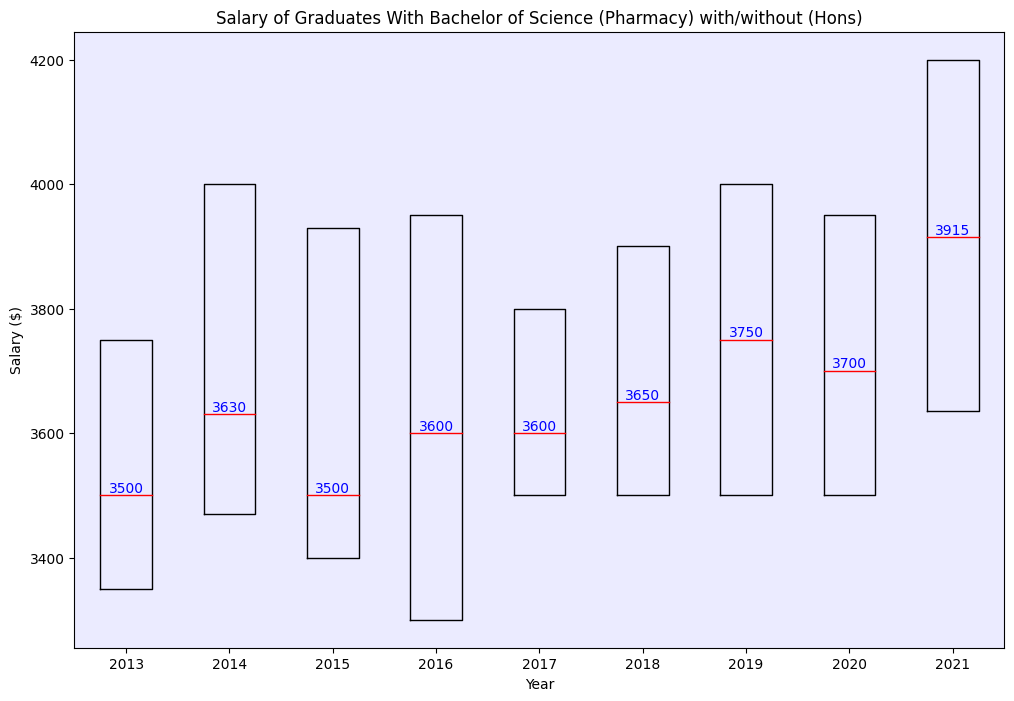

In [58]:
# initialise plot
fig, ax = plt.subplots(figsize=(12, 8))

# extract data from dataframe
boxes = []
years = df7['year'].unique()

for year in years:
    boxes.append({
            'label': year,
            'whislo':  int(df7[df7['year'] == year]['gross_mthly_25_percentile'].values[0]),  # Bottom whisker position
            'q1': int(df7[df7['year'] == year]['gross_mthly_25_percentile'].values[0]),
            'med': int(df7[df7['year'] == year]['gross_monthly_median'].values[0]),
            'q3': int(df7[df7['year'] == year]['gross_mthly_75_percentile'].values[0]),
            'whishi': int(df7[df7['year'] == year]['gross_mthly_75_percentile'].values[0]),  # Top whisker position
            'fliers': []  # Outliers
    })

# plot boxplot
boxplot = ax.bxp(boxes, showfliers=False, showcaps=False, medianprops=dict(color='red', linewidth=1))  # showcaps -> show minmax values; showfliers -> show outliers; medianprops -> median properties

# get y-value for medians for each year
medians = [median.get_ydata()[0] for median in boxplot['medians']]

# add text annotations for median values
for i, median in enumerate(medians):
    plt.text(i + 1, median, f'{median}', color='blue', ha='center', va='bottom')

# customise plot
ax.set_ylabel('Salary ($)')
ax.set_xlabel('Year')
ax.set_title("Salary of Graduates With Bachelor of Science (Pharmacy) with/without (Hons)")

# set background color
ax.set_facecolor((0,0,1,0.08))

plt.show()